### KNN

Training Algorithms:
    1. Store all the data

Prediction Algorithm:

    1. Calculate the distance from x to all points in your data
    2. Sort the points in your data by increasing distance from x
    3. Predict the majority label of the "k" closest points

**Pros:**
- Very simple
- Training is trivial
- Works with any number of classes
- Easy to add more data
- Few parameters
  - K
  - Distance Metric

**Cons**:
- High Prediction Cost ( worse for large data sets)
- Not good with high dimensional data
- Categorical Features don't work well

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data')

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


The header names are random acrynoms in which we don't know what each means

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [8]:
scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [9]:
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [10]:
df.columns[:-1]

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ'],
      dtype='object')

In [11]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [12]:
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, pred))

[[145  14]
 [ 12 129]]


In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



Text(0, 0.5, 'Error Rate')

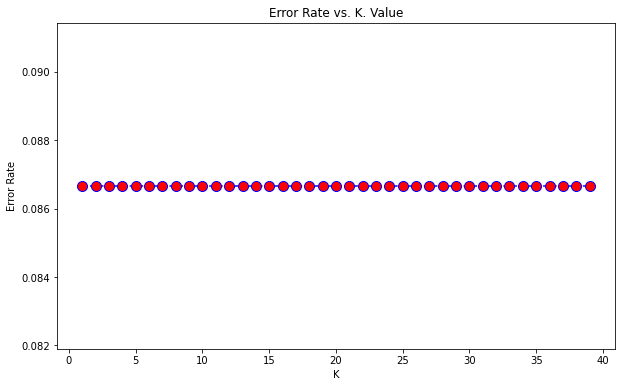

In [21]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle = 'dashed', marker='o', markerfacecolor ='red', markersize=10)
plt.title('Error Rate vs. K. Value')
plt.xlabel('K')
plt.ylabel('Error Rate')